In [452]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [453]:
file_path = 'car_evaluation_noisy.csv' # Replace with the actual file path
data = pd.read_csv(file_path)

In [454]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [455]:
cleaned_data = data.dropna()

for x in cleaned_data.index:
    if cleaned_data.loc[x, 'persons'] == 'more':
        cleaned_data.loc[x, 'persons'] = '5'
    if cleaned_data.loc[x, 'doors'] == '5more':
        cleaned_data.loc[x, 'doors'] = '5'


In [456]:
#cleaned_data['persons'] = cleaned_data['persons'].astype('float64')
#cleaned_data['doors'] = cleaned_data['doors'].astype('float64')

In [457]:
cleaned_data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [458]:
len(cleaned_data)

1180

In [460]:
print(cleaned_data)

     buying  maint doors persons lug_boot safety  class
0     vhigh  vhigh     2       2    small    med  unacc
1     vhigh  vhigh     2       2    small   high  unacc
3     vhigh  vhigh     2       2      med    med  unacc
5     vhigh  vhigh     2       2      big    low  unacc
6     vhigh  vhigh     2       2      big    med  unacc
...     ...    ...   ...     ...      ...    ...    ...
1719    low    low     5       5    small    med    acc
1720    low    low     5       5    small   high   good
1721    low    low     5       5      med    low  unacc
1724    low    low     5       5      big    low  unacc
1725    low    low     5       5      big    med   good

[1180 rows x 7 columns]


In [461]:
label_encoders = {}
for column in cleaned_data.columns[:1]: # Targeting Buying column
    le = LabelEncoder()
    cleaned_data[column] = le.fit_transform(cleaned_data[column])
    label_encoders[column] = le

cleaned_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,vhigh,2,2,small,med,unacc
1,3,vhigh,2,2,small,high,unacc
3,3,vhigh,2,2,med,med,unacc
5,3,vhigh,2,2,big,low,unacc
6,3,vhigh,2,2,big,med,unacc


In [462]:
X = cleaned_data.drop(columns='buying').copy()
X.head()

,maint,doors,persons,lug_boot,safety,class
0,vhigh,2,2,small,med,unacc
1,vhigh,2,2,small,high,unacc
3,vhigh,2,2,med,med,unacc
5,vhigh,2,2,big,low,unacc
6,vhigh,2,2,big,med,unacc


In [463]:
pd.get_dummies(X, columns=['maint','lug_boot','safety','class','doors','persons']).head()

,maint_high,maint_low,maint_med,maint_vhigh,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,...,class_good,class_unacc,class_vgood,doors_2,doors_3,doors_4,doors_5,persons_2,persons_4,persons_5
0,False,False,False,True,False,False,True,False,False,True,...,False,True,False,True,False,False,False,True,False,False
1,False,False,False,True,False,False,True,True,False,False,...,False,True,False,True,False,False,False,True,False,False
3,False,False,False,True,False,True,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
5,False,False,False,True,True,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
6,False,False,False,True,True,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False


In [464]:
X = pd.get_dummies(X, columns=['maint','lug_boot','safety','class','doors','persons'])

In [465]:
y = cleaned_data['buying'].copy()
y.head()

0    3
1    3
3    3
5    3
6    3
Name: buying, dtype: int64

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [467]:
clf = DecisionTreeClassifier(criterion="gini", random_state=5, max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

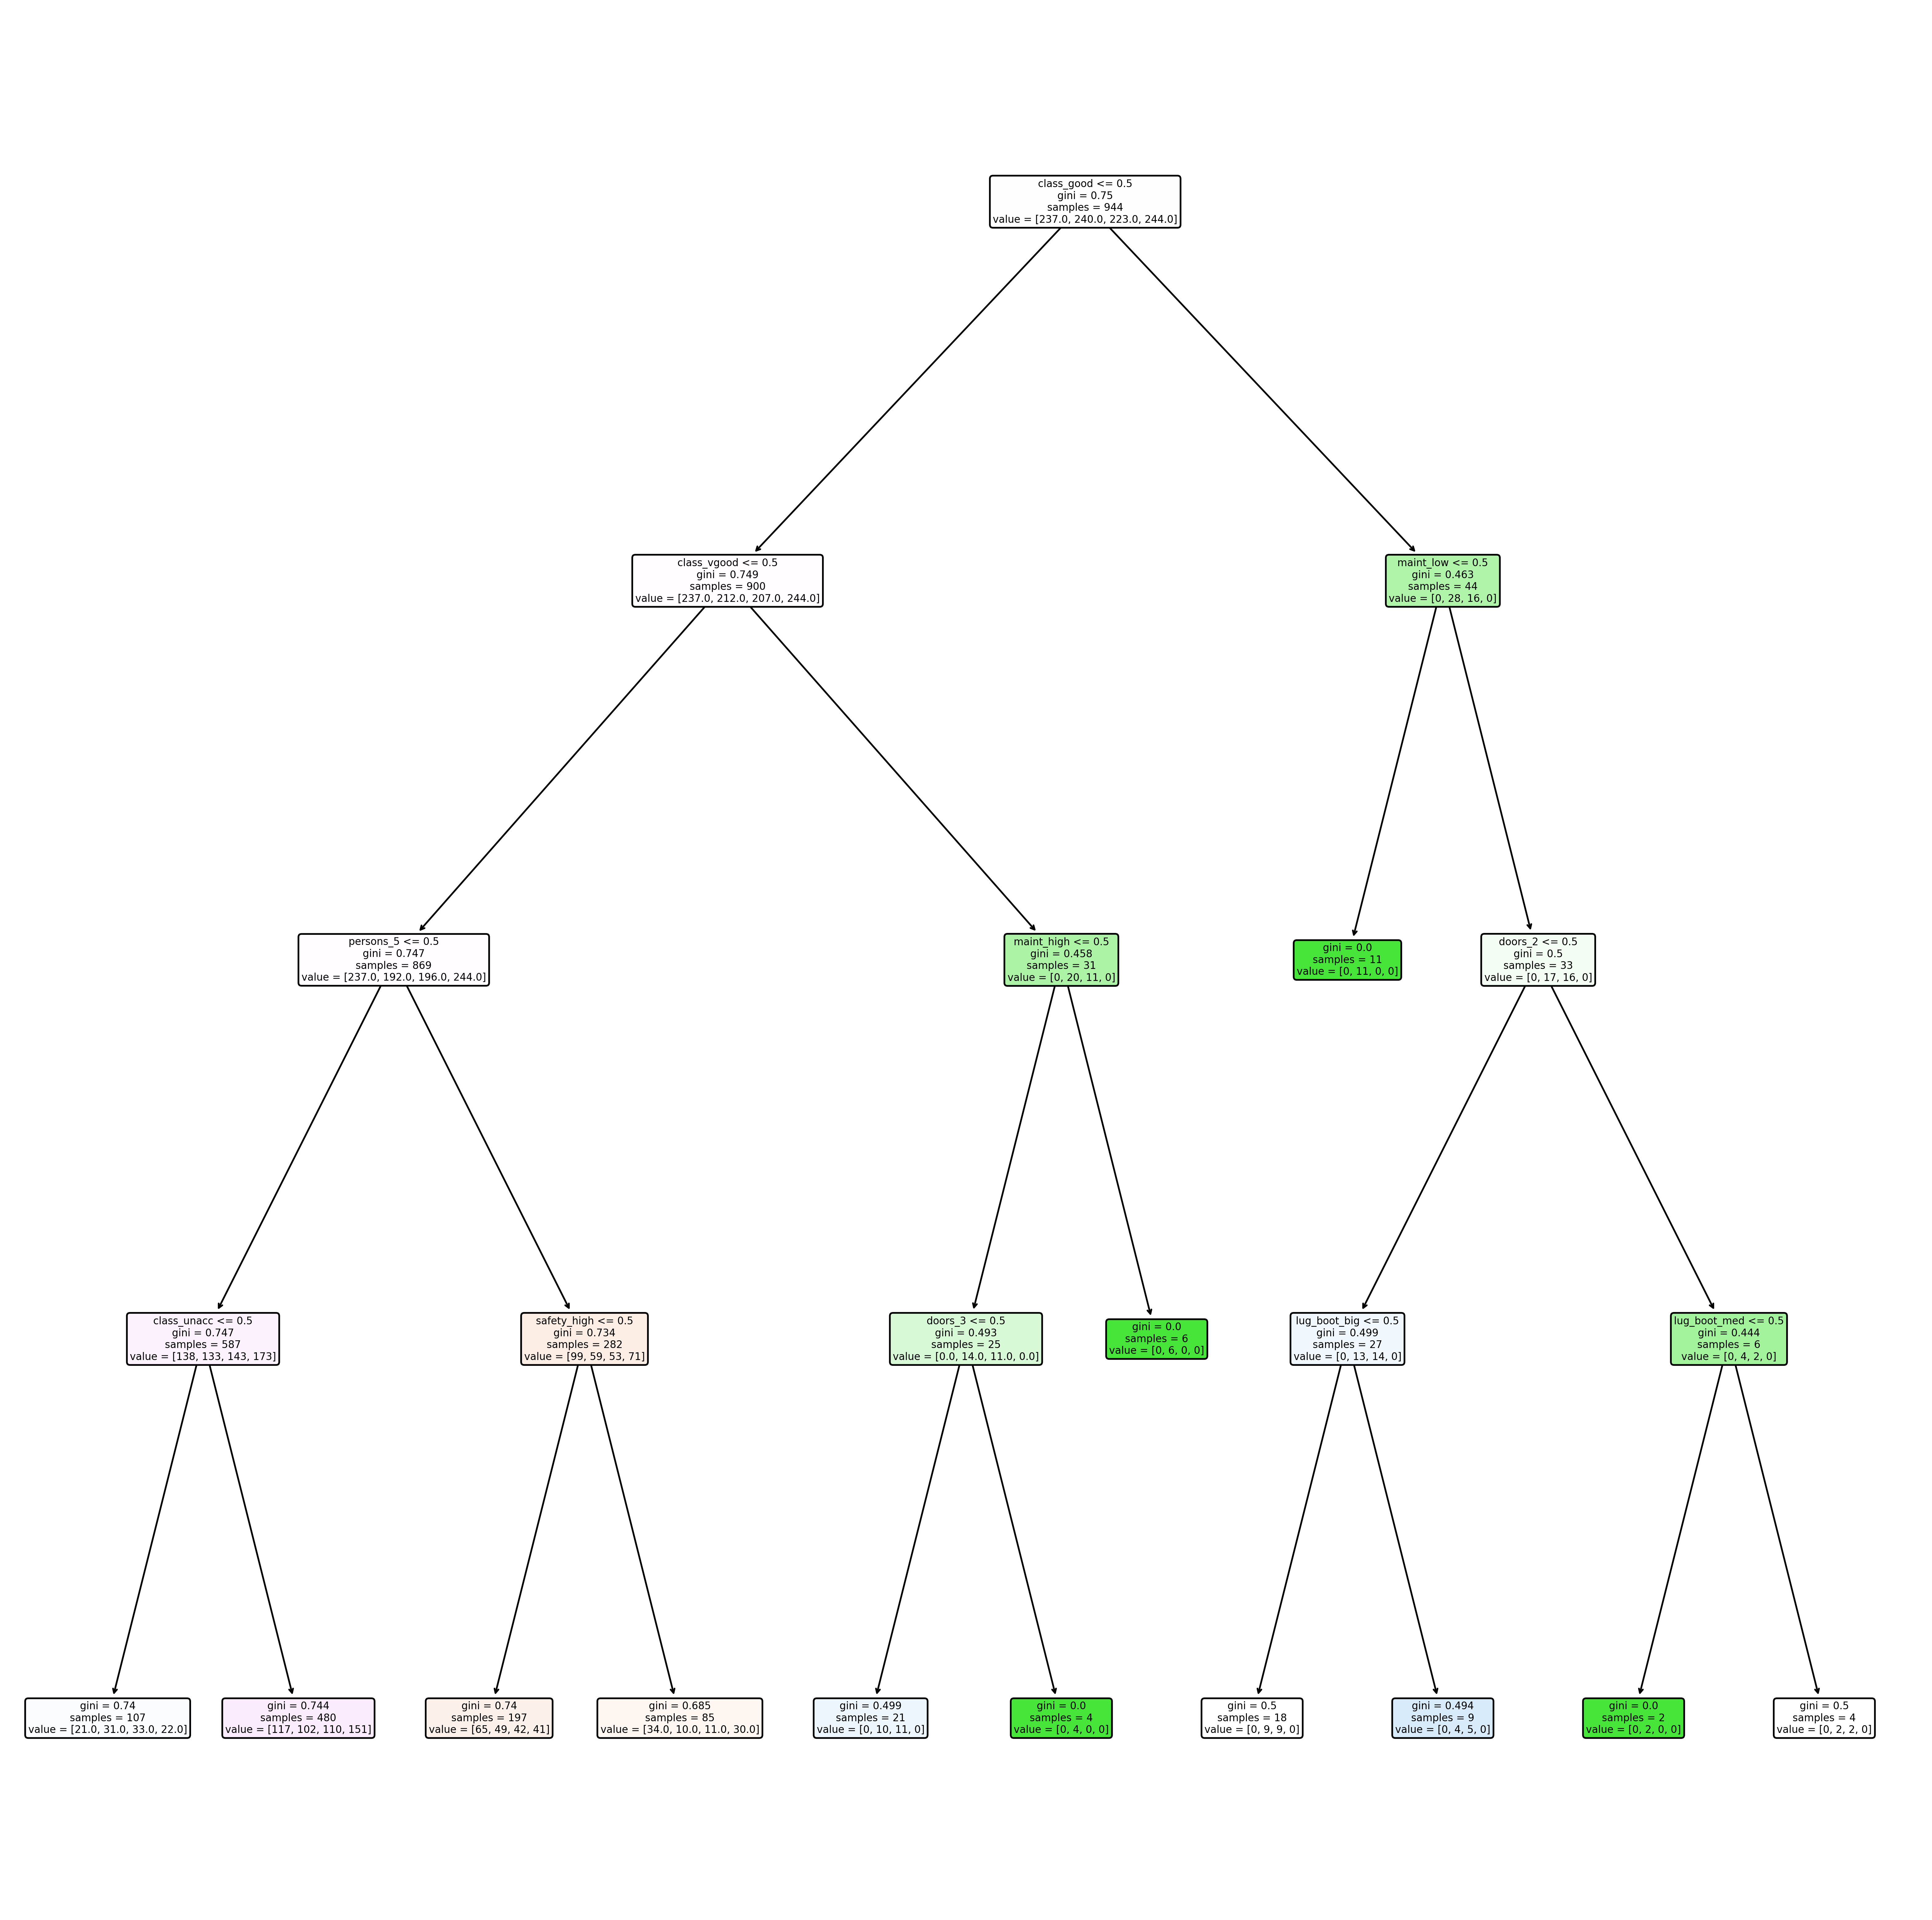

In [468]:
plt.figure(figsize=(20,20),dpi=400)
plot_tree(clf, feature_names=X.columns, filled=True, rounded = True);
plt.show()

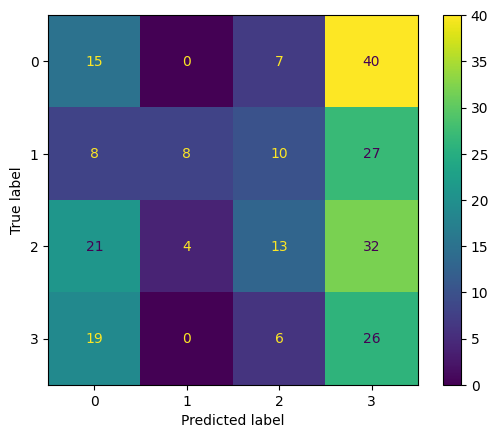

In [470]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()